# Visualisation de l'indice de précision obtenu dans results.csv

In [1]:
import pandas as pd

In [2]:
results = pd.read_csv('results.csv')
results = results.iloc[4:]  #premières 4 lignes redondantes, éliminées
results = results.reset_index(drop=True)

### Visualisation de la précision dense vs sparse

On visualise ici les différentes performances selon le type de retriever choisi (sparse / dense).

retriever_type
dense     AxesSubplot(0.125,0.125;0.775x0.755)
sparse    AxesSubplot(0.125,0.125;0.775x0.755)
Name: precision, dtype: object

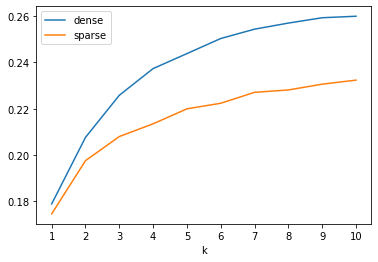

In [3]:
results_sparse_dense = results.iloc[:20]
results_sparse_dense.set_index('k', inplace=True)
results_sparse_dense.groupby('retriever_type')['precision'].plot(legend=True,xticks=[i for i in range(1,11)])

Le **retriever dense** a globalement une **meilleure performance par rapport au sparse**, voir même une performance nettement meilleure lorsque  k > 3

### Visualisation de la précision par type de filtrage et par type de retriever

On visualise ici les différentes performances selon le type de retriever choisi (sparse / dense) et le type de filtrage (dossier / theme).

filter_level  retriever_type
dossier       dense             AxesSubplot(0.125,0.125;0.775x0.755)
              sparse            AxesSubplot(0.125,0.125;0.775x0.755)
theme         dense             AxesSubplot(0.125,0.125;0.775x0.755)
              sparse            AxesSubplot(0.125,0.125;0.775x0.755)
Name: precision, dtype: object

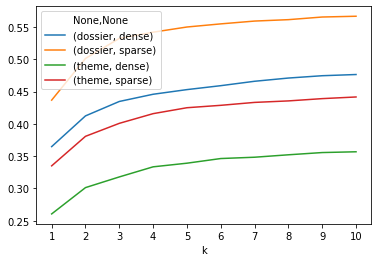

In [43]:
results_retriever_filtrage = results.iloc[20:]
results_retriever_filtrage.set_index('k', inplace=True)
results_retriever_filtrage.groupby(['filter_level', 'retriever_type'])['precision'].plot(legend=True,xticks=[i for i in range(1,11)])

Le filtrage par **dossier est globalement plus performant que celui par thème**. <br>
Le **choix d'un filtrage par dossier et d'un retriever de type sparse** sembe donner les **meilleurs résulats** en terme de performance. Il est donc important de le remarquer: le retriever sparse améliore sa performance lorsqu'on fait du filtrage par dossier.

### Visualisation filtrage *dossier*

On visualise ici les différentes performances pour un filtrage de type *dossier* selon le type de retriever (dense/sparse)

filter_level  retriever_type
dossier       dense             AxesSubplot(0.125,0.125;0.775x0.755)
              sparse            AxesSubplot(0.125,0.125;0.775x0.755)
Name: precision, dtype: object

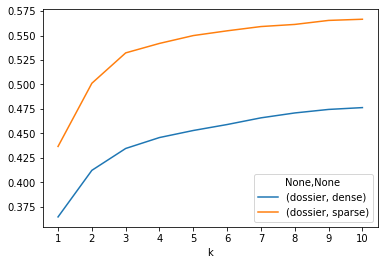

In [45]:
results_dossier = results.iloc[20:40]
results_dossier.set_index('k', inplace=True)
results_dossier.groupby(['filter_level', 'retriever_type'])['precision'].plot(legend=True,xticks=[i for i in range(1,11)])

Le retriever sparse donne des meilleurs résultats que le dense pour un filtrage 'dossier'

### Visualisation filtrage *thème*

On visualise ici les différentes performances pour un filtrage de type *thème* selon le type de retriever (dense/sparse)

filter_level  retriever_type
theme         dense             AxesSubplot(0.125,0.125;0.775x0.755)
              sparse            AxesSubplot(0.125,0.125;0.775x0.755)
Name: precision, dtype: object

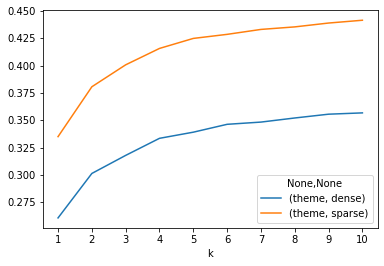

In [41]:
results_theme = results.iloc[40:]
results_theme.set_index('k', inplace=True)
results_theme.groupby(['filter_level', 'retriever_type'])['precision'].plot(legend=True,xticks=[i for i in range(1,11)])

Le retriever sparse donne des meilleurs résultats que le dense pour un filtrage 'thème'

## Conclusions

- L'ajout du filtrage améliore de manière importante la performance
- Pour k>5 ou k>6, globalement on remarque pas d'augmentation importante de performance
- Le retriever *sparse* a une plus grande performance lorsqu'on lui rajoute du filtrage
- Le filtrage *dossier* couplé avec un retriever *sparse* donne les meilleurs résultats absolus en terme de performance
- Il reste peut etre à clarifier pourquoi dans le cas *sans filtrage* c'est plutot le retriever *dense* qui donne des meilleurs résultats